In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data=pd.read_csv('BlackFriday.csv')

In [3]:
data.shape

(537577, 12)

In [4]:
df=pd.DataFrame(data)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
del df['Product_Category_2']
del df['Product_Category_3']
df.rename(columns={'Product_Category_1':'Product_Category'},inplace=True)

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Saving the clean data

In [10]:
df.to_csv('clean_black_friday')

Analyzing columns

In [11]:
df['User_ID'].nunique()

5891

In [12]:
df['Product_ID'].nunique()

3623

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['Occupation'].nunique()

21

In [16]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1])

In [18]:
df['Product_Category'].nunique()

18

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Purchase'].sum()

5017668378

In [21]:
for column in df.columns:
    print(df[column].nunique(), "\t:" ,column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category
17959 	: Purchase


In [22]:
for column in df.columns:
    print(df[column].unique(), "\t:" ,column)

[1000001 1000002 1000003 ... 1004113 1005391 1001529] 	: User_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742'] 	: Product_ID
['F' 'M'] 	: Gender
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 	: Age
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 	: Occupation
['A' 'C' 'B'] 	: City_Category
['2' '4+' '3' '1' '0'] 	: Stay_In_Current_City_Years
[0 1] 	: Marital_Status
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9] 	: Product_Category
[ 8370 15200  1422 ... 14539 11120 18426] 	: Purchase


Analyse the gender 

<Axes: xlabel='Gender', ylabel='count'>

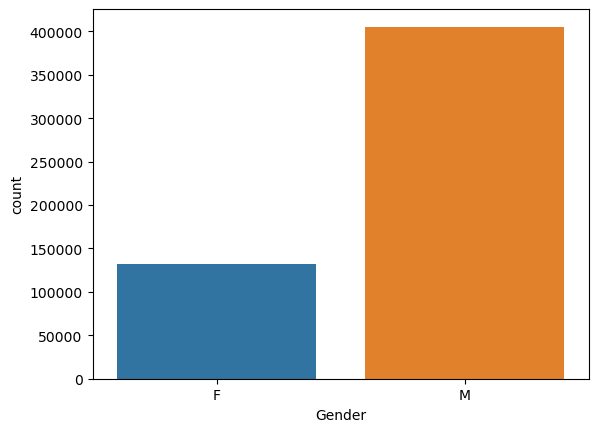

In [23]:
sns.countplot(df,x='Gender')

In [24]:
dff=df[df['Gender']=='F']
dfm=df[df['Gender']=='M']

In [25]:
dff

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
537472,1004726,P00037142,F,36-45,16,C,2,1,1,11845
537473,1004726,P00058442,F,36-45,16,C,2,1,5,5155
537474,1004726,P00303242,F,36-45,16,C,2,1,5,8626
537475,1004727,P00295942,F,55+,0,C,3,0,2,12826


In [26]:
dfm

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [27]:
dff['Purchase'].sum()

1164624021

In [28]:
dfm['Purchase'].sum()

3853044357

<Axes: xlabel='Gender', ylabel='Purchase'>

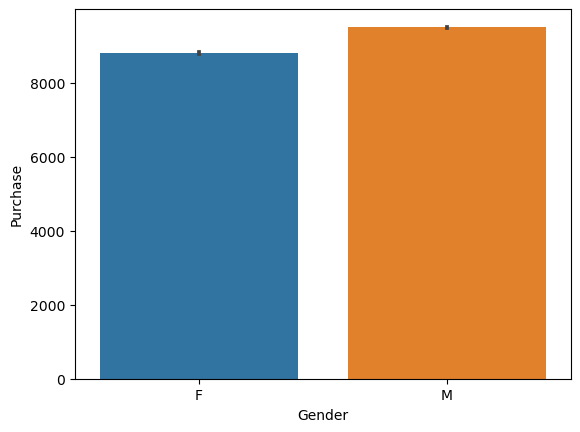

In [29]:
sns.barplot(df,x='Gender',y='Purchase')

percentage sales of male and female

In [30]:
pf=dff['Purchase'].sum()*100/df['Purchase'].sum()
pf

23.210462176143437

In [31]:
pm=dfm['Purchase'].sum()*100/df['Purchase'].sum()
pm

76.78953782385656

In [32]:
gender=pd.crosstab(df['Gender'],df['Purchase'].count())
gender

col_0,537577
Gender,
F,132197
M,405380


array([<Axes: ylabel='537577'>], dtype=object)

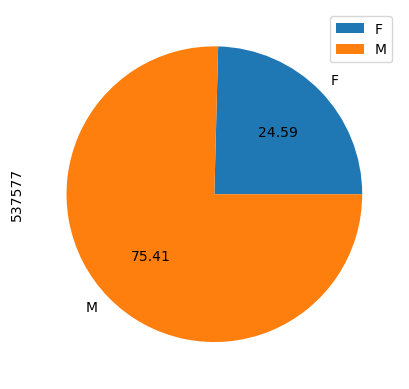

In [33]:
gender.plot.pie(autopct='%.2f',subplots=True)

In [34]:
df_pur=df.groupby('Gender').sum()['Purchase']

In [35]:
df_pur

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

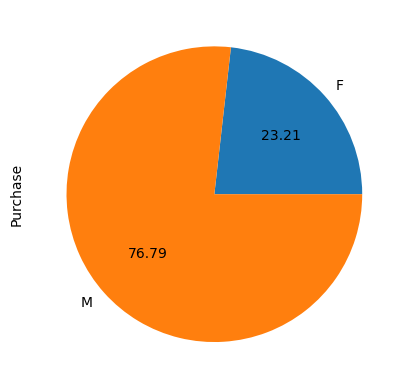

In [36]:
df_pur.plot.pie(autopct='%.2f')

In [37]:
df.groupby('Gender').mean(numeric_only=True)['Purchase']

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

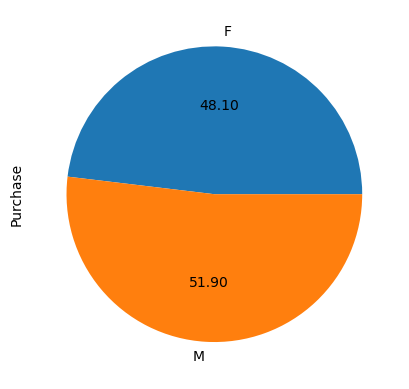

In [38]:
df.groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%.2f')

In [39]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Analysing age and material status

In [40]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: xlabel='Age'>

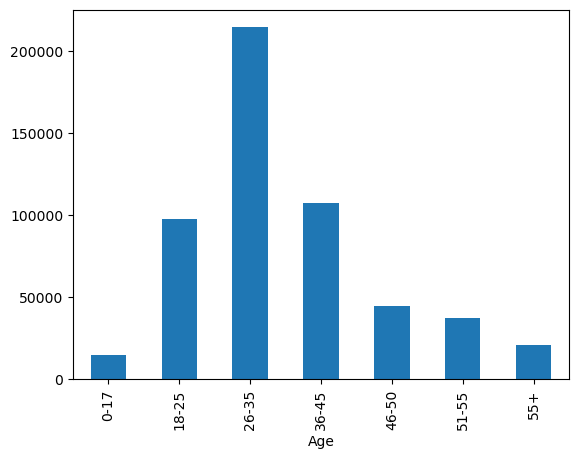

In [41]:
df.groupby('Age').size().plot(kind='bar')

In [42]:
df_age=df.groupby('Age')['Product_ID']

In [43]:
df_age.nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

<Axes: xlabel='Age'>

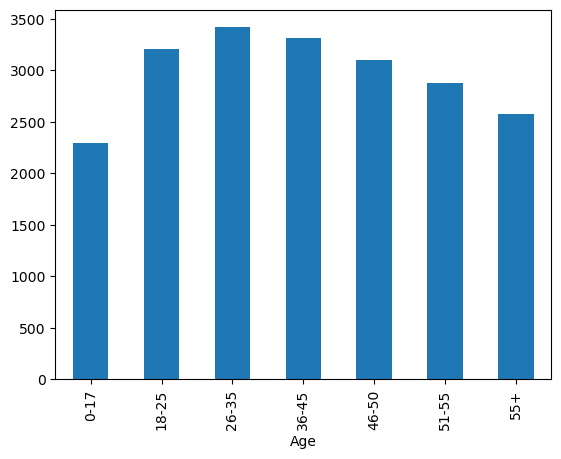

In [44]:
df_age.nunique().plot(kind='bar')

In [45]:
df_age=df_age.nunique()


In [46]:
df_age=pd.DataFrame(df_age)

<Axes: xlabel='Age'>

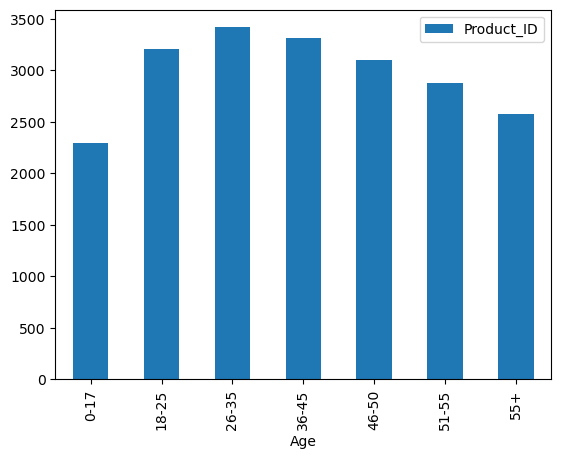

In [47]:
df_age.plot(kind='bar')

<Axes: xlabel='Age'>

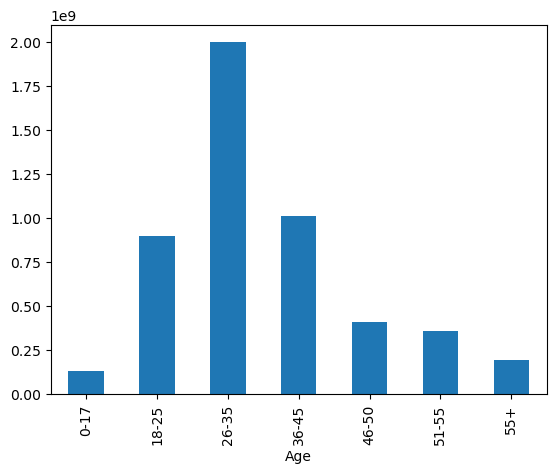

In [48]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')

<Axes: ylabel='Purchase'>

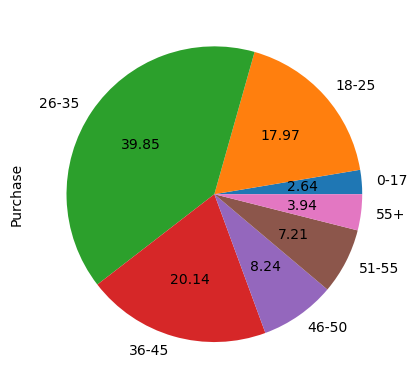

In [49]:
df.groupby('Age').sum()['Purchase'].plot(kind='pie',autopct='%.2f')

In [50]:
df.groupby('Age').mean(numeric_only=True)['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

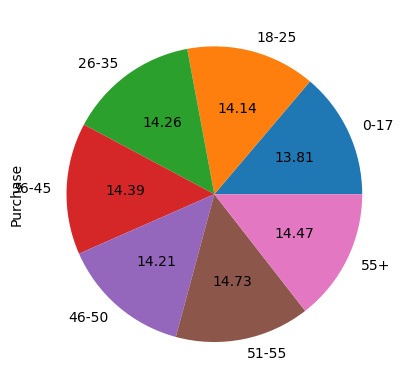

In [51]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%.2f')

<Axes: >

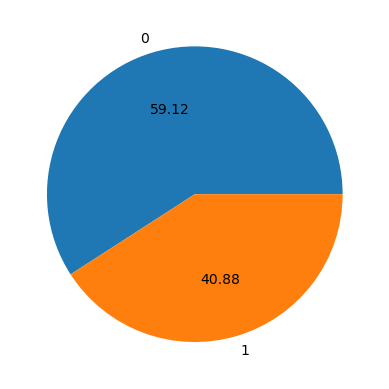

In [52]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.2f')

<Axes: >

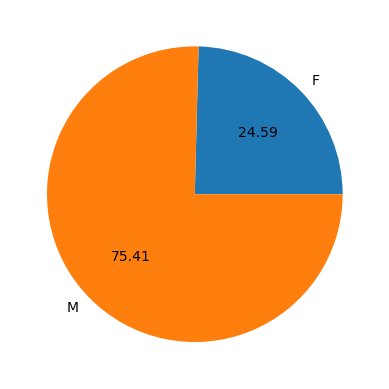

In [53]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.2f')

In [54]:
df_ga=pd.crosstab(df['Age'],df['Gender'])




In [55]:
df_ga

Gender,F,M
Age,,
0-17,4953,9754
18-25,24057,73577
26-35,49348,165342
36-45,26420,81079
46-50,12856,31670
51-55,9634,27984
55+,4929,15974


<Axes: xlabel='Age'>

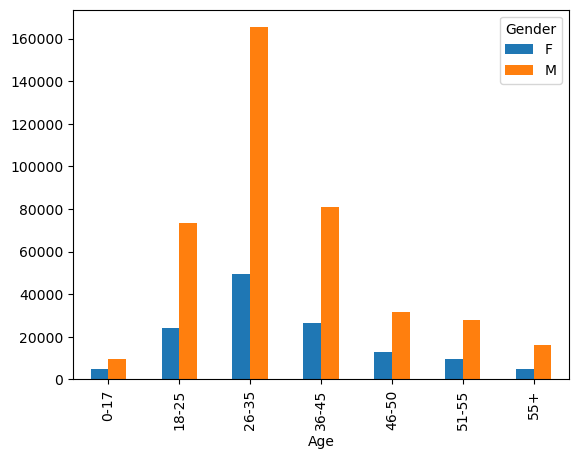

In [56]:

df_ga.plot(kind='bar')

Multi column analysis

In [57]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='count'>

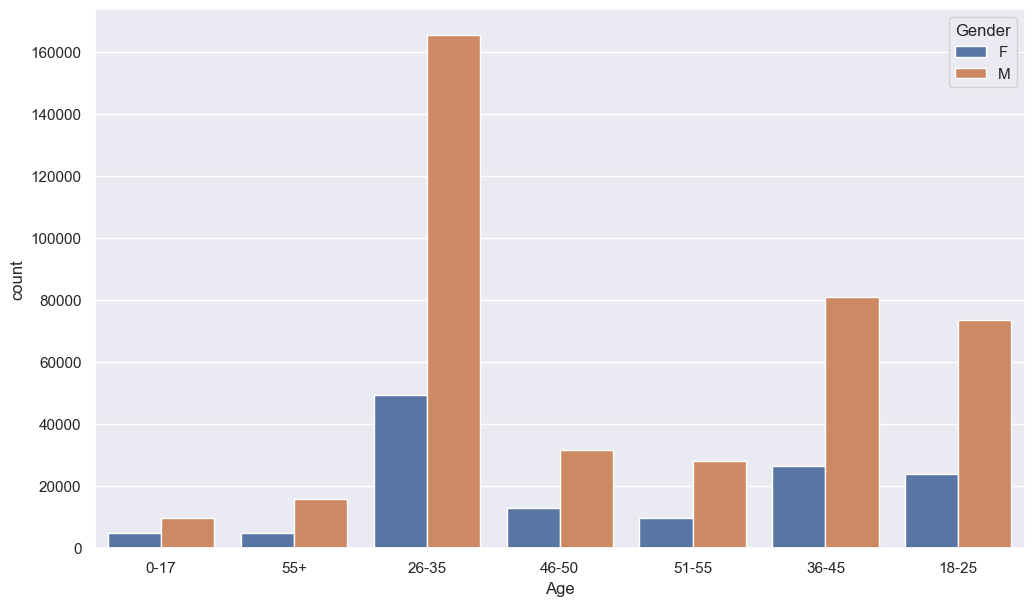

In [58]:
sns.set_theme(rc={'figure.figsize':(12,7)})
sns.countplot(df,x='Age',hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

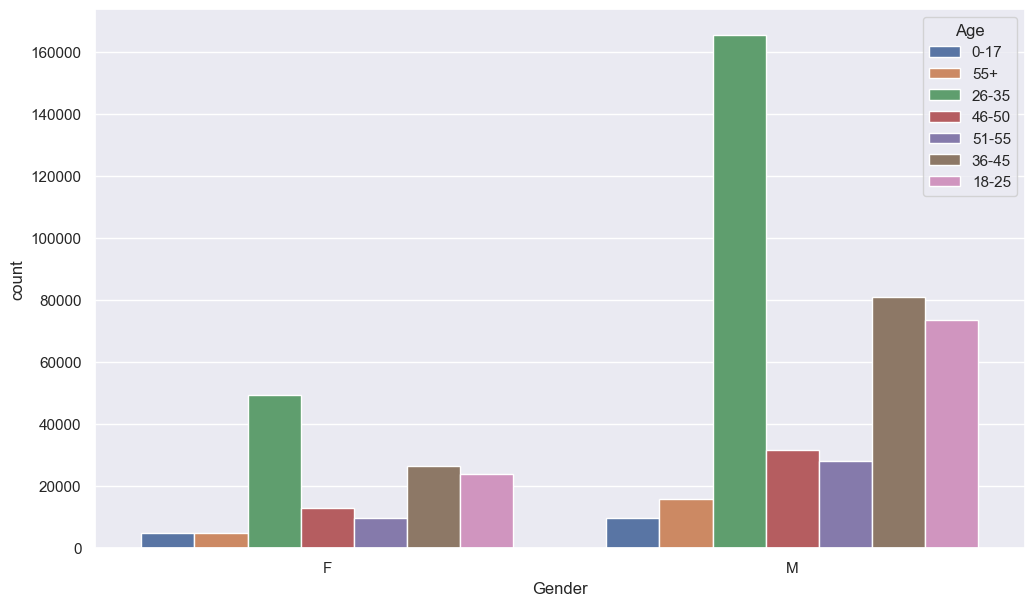

In [59]:
sns.set_theme(rc={'figure.figsize':(12,7)})
sns.countplot(df,hue='Age',x='Gender')

<Axes: xlabel='Marital_Status', ylabel='count'>

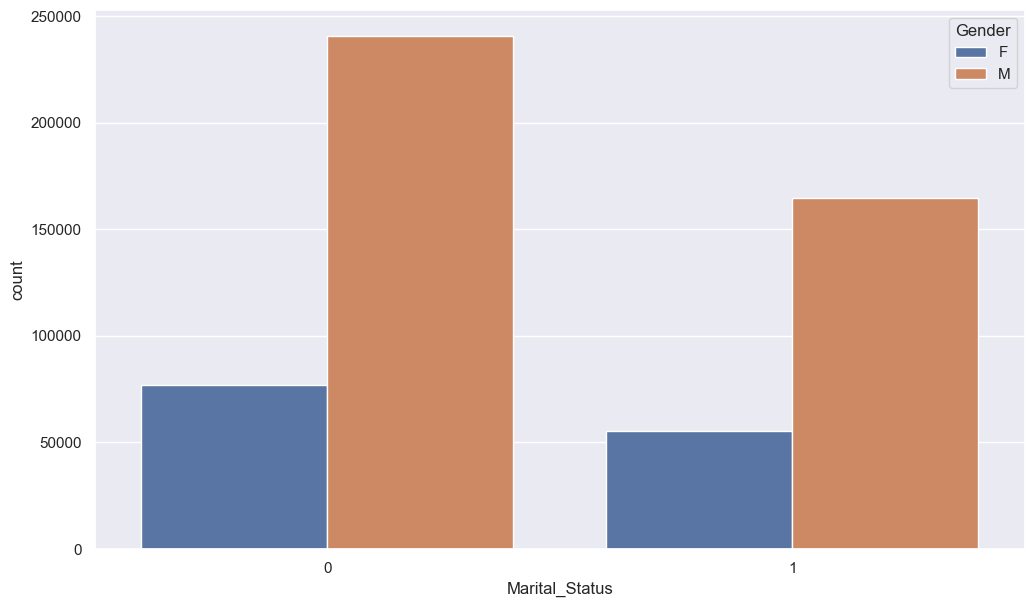

In [60]:
sns.countplot(df,x='Marital_Status',hue='Gender')

<Axes: xlabel='City_Category', ylabel='count'>

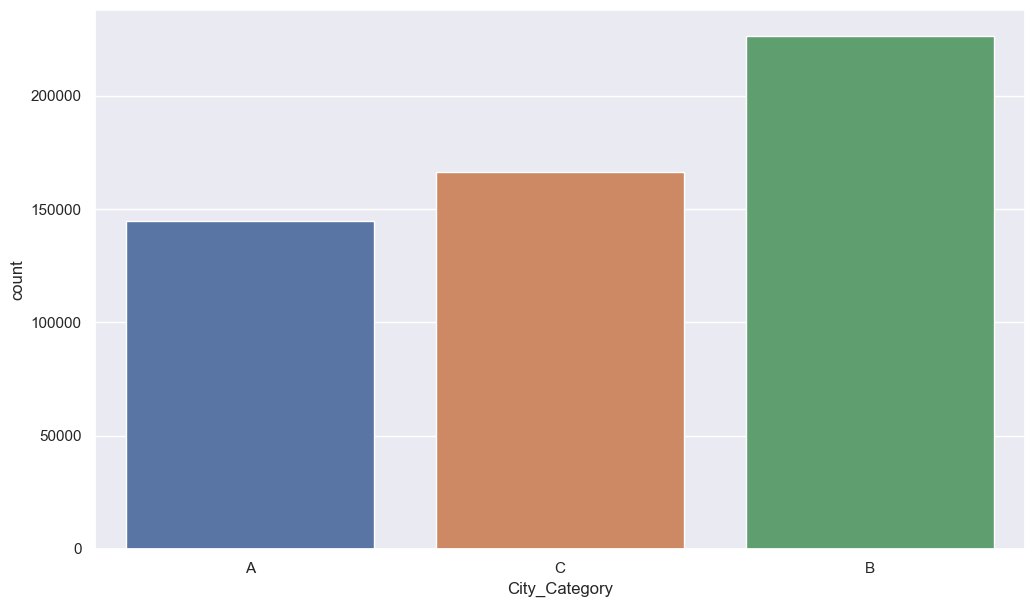

In [61]:
sns.countplot(df,x='City_Category')

In [62]:
df.groupby('City_Category').sum()['Purchase']

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

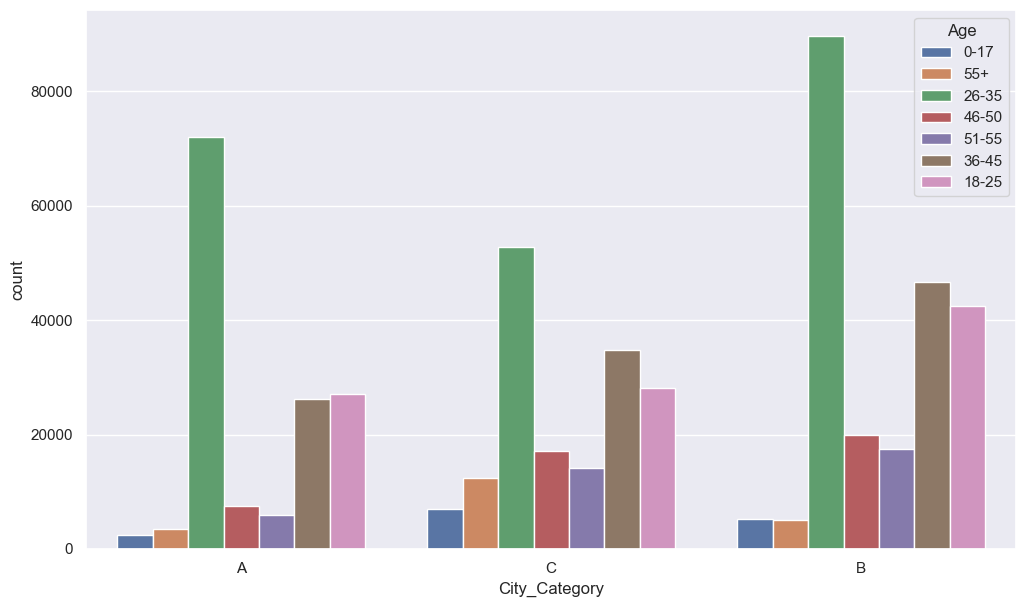

In [63]:
sns.countplot(df,x='City_Category',hue='Age')